# Metadata

```yaml
course:   DS 5001 
module:   Final Project
topic:    Exploratory Text Analytics using Television Sitcom Scripts Final Report
author:   Eric Tria
date:     2 May 2023
```

# Student Info

```yaml
name:     Eric Tria
user_id:  emt4wf
email:    emt4wf@virginia.edu
```

# Project: Exploratory Text Analytics using Television Sitcom Scripts

## 1. Introduction
Describe the nature of your corpus and the question(s) you've asked of the data.

## 2. Source Data
Provide a description of all relativant source files and describe the following features for each source file:

### 2.1 Provenance
Where did they come from? Describe the website or other source and provide relevant URLs.

### 2.2 Location
Provide a link to the source files in UVA Box.

### 2.3 Description
What is the general subject matter of the corpus? How many observations are there? What is the average document length?

### 2.4 Format
A description of both the file formats of the source files, e.g., plaintext, XML, CSV, etc., and the internal structure where applicable. For - example, if XML then specify document type (e.g., TEI or XHTML).

## 3. Data Model
Describe the analytical tables you generated in the process of tokenization, annotation, and analysis of your corpus. You provide a list of tables with field names and their definition, along with URLs to each associated CSV file.

## 4. Exploration
Describe each of your explorations, such as PCA and topic models. For each, include the relevant parameters and hyperparemeters used to generate each model and visualization. For your visualizations, you should use at least three (but likely more) of the following visualization types:

#### 4.1 Hierarchical cluster diagrams
The first thing we will check is if the seasons between the 3 series are related with one another.

In [17]:
import numpy as np
import pandas as pd

from lib.corpus_enhancer import CorpusEnhancer

from numpy.linalg import norm
from scipy.spatial.distance import pdist

import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

import seaborn as sns; sns.set()

In [23]:
final_dir = 'final/'
series_prefixes = ['PNR', 'B99', 'OFFICE']

OHCO = ['series_id', 'season_id', 'episode_id', 'scene_id', 'line_id', 'token_id']
TOKENS = OHCO[:6]
LINES = OHCO[:5]
SCENES = OHCO[:4]
EPISODES = OHCO[:3]
SEASONS = OHCO[:2]
SERIES = OHCO[:1]

colors = 'YlGnBu'

In [4]:
corpora = []
for sp in series_prefixes:
    corpora.append(pd.read_csv('{0}{1}-CORPUS.csv'.format(final_dir, sp)))

CORPUS = pd.concat(corpora).set_index(EPISODES).drop(list(set(OHCO) - set(EPISODES)), axis = 1)
CORPUS

pos_tuple   pos token_str term_str
series_id   season_id episode_id                                           
parksandrec 1         1           ('Hello.', 'NN')    NN    Hello.    hello
                      1              ('Hi.', 'NN')    NN       Hi.       hi
                      1             ('My', 'PRP$')  PRP$        My       my
                      1             ('name', 'NN')    NN      name     name
                      1              ('is', 'VBZ')   VBZ        is       is
...                                            ...   ...       ...      ...
theoffice   9         23            ('that', 'IN')    IN      that     that
                      23            ('kind', 'NN')    NN      kind     kind
                      23              ('of', 'IN')    IN        of       of
                      23             ('the', 'DT')    DT       the      the
                      23          ('point?', 'NN')    NN    point?    point

[1563801 rows x 4 columns]

In [5]:
ce = CorpusEnhancer(CORPUS, EPISODES)

In [6]:
VOCAB = ce.generate_enhanced_vocab(EPISODES)

Using TF method: sum


In [7]:
VOCAB

,n,n_chars,p,i,h,max_pos,n_pos,cat_pos,stop,tfidf_mean,tfidf_sum,tfidf_median,tfidf_max,dfidf
term_str,,,,,,,,,,,,,,
0,17,1,1.087610e-05,16.488480,0.000179,CD,2,"{CD, NN}",0,0.001519,0.022779,0.001325,0.003502,73.603359
00,1,2,6.397703e-07,20.575943,0.000013,CD,1,{CD},0,0.002166,0.002166,0.002166,0.002166,8.813781
000003,1,6,6.397703e-07,20.575943,0.000013,NN,1,{NN},0,0.002497,0.002497,0.002497,0.002497,8.813781
000007044,1,9,6.397703e-07,20.575943,0.000013,CD,1,{CD},0,0.002036,0.002036,0.002036,0.002036,8.813781
001834310,1,9,6.397703e-07,20.575943,0.000013,CD,1,{CD},0,0.001975,0.001975,0.001975,0.001975,8.813781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ühumming,1,8,6.397703e-07,20.575943,0.000013,NN,1,{NN},0,0.003122,0.003122,0.003122,0.003122,8.813781
ümusical,4,8,2.559081e-06,18.575943,0.000048,NN,1,{NN},0,0.012489,0.012489,0.012489,0.012489,8.813781
ünew,1,4,6.397703e-07,20.575943,0.000013,NN,1,{NN},0,0.002973,0.002973,0.002973,0.002973,8.813781


In [15]:
libs = []
for sp in series_prefixes:
    libs.append(pd.read_csv('{0}{1}-LIB.csv'.format(final_dir, sp)))

LIB = pd.concat(libs)
LIB['series_season'] = LIB.apply(lambda x: '{0} Season {1}'.format(x['series_name'], x['season_id']), axis = 1)
LIB = LIB.set_index(SEASONS)
LIB

num_episodes  year  viewers_millions  rt_rating  \
series_id   season_id                                                    
parksandrec 1                     6  2009              6.00         68   
            2                    24  2010              4.60         96   
            3                    16  2011              5.10        100   
            4                    22  2012              4.40        100   
            5                    22  2013              4.06         96   
            6                    22  2014              3.76         96   
            7                    13  2015              4.57         89   
brooklyn99  1                    22  2014              4.80         89   
            2                    23  2015              4.87        100   
            3                    23  2016              3.98         93   
            4                    22  2017              2.87        100   
            5                    22  2018              2.71        100   
            6                    18  2019              3.11        100   
            7                    13  2020              2.69         89   
            8                    10  2021              1.69         89   
theoffice   1                     6  2005              5.40         69   
            2                    22  2006              8.00        100   
            3                    25  2007              8.30        100   
            4                    19  2008              8.04         83   
            5                    28  2009              9.04        100   
            6                    26  2010              8.73         73   
            7                    26  2011              7.73         83   
            8                    24  2012              6.51         44   
            9                    25  2013              5.06         79   

                                series_name                  series_season  
series_id   season_id                                                       
parksandrec 1          Parks and Recreation  Parks and Recreation Season 1  
            2          Parks and Recreation  Parks and Recreation Season 2  
            3          Parks and Recreation  Parks and Recreation Season 3  
            4          Parks and Recreation  Parks and Recreation Season 4  
            5          Parks and Recreation  Parks and Recreation Season 5  
            6          Parks and Recreation  Parks and Recreation Season 6  
            7          Parks and Recreation  Parks and Recreation Season 7  
brooklyn99  1            Brooklyn Nine-Nine    Brooklyn Nine-Nine Season 1  
            2            Brooklyn Nine-Nine    Brooklyn Nine-Nine Season 2  
            3            Brooklyn Nine-Nine    Brooklyn Nine-Nine Season 3  
            4            Brooklyn Nine-Nine    Brooklyn Nine-Nine Season 4  
            5            Brooklyn Nine-Nine    Brooklyn Nine-Nine Season 5  
            6            Brooklyn Nine-Nine    Brooklyn Nine-Nine Season 6  
            7            Brooklyn Nine-Nine    Brooklyn Nine-Nine Season 7  
            8            Brooklyn Nine-Nine    Brooklyn Nine-Nine Season 8  
theoffice   1                    The Office            The Office Season 1  
            2                    The Office            The Office Season 2  
            3                    The Office            The Office Season 3  
            4                    The Office            The Office Season 4  
            5                    The Office            The Office Season 5  
            6                    The Office            The Office Season 6  
            7                    The Office            The Office Season 7  
            8                    The Office            The Office Season 8  
            9                    The Office            The Office Season 9

Reduce the number of features in the returned TFIDF matrix to the 1000 most significant terms, using DFIDF as your significance measure and only using terms whose maximum part-of-speech belongs to this set: `NN NNS VB VBD VBG VBN VBP VBZ JJ JJR JJS RB RBR RBS`. Note, these are all open categories, excluding proper nounns.

In [9]:
max_pos_set = ['NN', 'NNS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'JJ', 'JJR', 'RB', 'RBR', 'RBS']
VOCAB_SIG = VOCAB.copy()
VOCAB_SIG = VOCAB_SIG[VOCAB_SIG['max_pos'].isin(max_pos_set)]
VOCAB_SIG = VOCAB_SIG.sort_values('dfidf', ascending = False).head(1000)

In [10]:
VOCAB_SIG

,n,n_chars,p,i,h,max_pos,n_pos,cat_pos,stop,tfidf_mean,tfidf_sum,tfidf_median,tfidf_max,dfidf
term_str,,,,,,,,,,,,,,
lady,247,4,0.000158,12.627575,0.001995,NN,2,"{JJ, NN}",0,0.000621,0.103006,0.000452,0.002362,238.831132
clear,253,5,0.000162,12.592949,0.002038,JJ,2,"{JJ, NN}",0,0.000619,0.102788,0.000475,0.003921,238.831132
answer,236,6,0.000151,12.693300,0.001917,NN,2,"{VB, NN}",0,0.000584,0.097014,0.000445,0.001959,238.831132
lose,240,4,0.000154,12.669052,0.001945,VB,4,"{JJ, VB, VBP, NN}",0,0.000603,0.100073,0.000445,0.004540,238.831132
met,242,3,0.000155,12.657079,0.001960,NN,2,"{NNP, NN}",0,0.000605,0.100446,0.000471,0.001747,238.831132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
meat,110,4,0.000070,13.794583,0.000971,NN,1,{NN},0,0.001341,0.085852,0.000882,0.006930,180.081996
tired,89,5,0.000057,14.100209,0.000803,VBN,2,"{VBN, NN}",0,0.001137,0.072737,0.000835,0.005561,180.081996
destroy,84,7,0.000054,14.183625,0.000762,NN,1,{NN},0,0.001061,0.067891,0.000855,0.004072,180.081996


In [11]:
SIG_TERMS = VOCAB_SIG.index.to_list()
TFIDF_STACKED = ce.TFIDF.stack()
TFIDF_SIG = TFIDF_STACKED[TFIDF_STACKED.index.isin(SIG_TERMS, level = 'term_str')]
TFIDF_MATRIX = TFIDF_SIG.unstack()
TFIDF_MATRIX

term_str                             able  absolutely    accept  accident  \
series_id  season_id episode_id                                             
brooklyn99 1         1           0.000000    0.000375  0.000000  0.000000   
                     2           0.000484    0.000000  0.000000  0.000000   
                     3           0.000454    0.000365  0.000750  0.000000   
                     4           0.000000    0.000000  0.000000  0.000000   
                     5           0.000000    0.000000  0.000000  0.000000   
...                                   ...         ...       ...       ...   
theoffice  9         19          0.000541    0.000000  0.000000  0.000935   
                     20          0.000000    0.000497  0.000000  0.000000   
                     21          0.000367    0.000000  0.001210  0.000634   
                     22          0.000000    0.000494  0.000000  0.000000   
                     23          0.000000    0.000000  0.000441  0.000000   

term_str                         according       act    acting    actual  \
series_id  season_id episode_id                                            
brooklyn99 1         1                 0.0  0.000000  0.000000  0.000000   
                     2                 0.0  0.000642  0.000000  0.000000   
                     3                 0.0  0.000000  0.000000  0.000000   
                     4                 0.0  0.001228  0.000000  0.000000   
                     5                 0.0  0.000000  0.000000  0.000000   
...                                    ...       ...       ...       ...   
theoffice  9         19                0.0  0.001435  0.000000  0.000000   
                     20                0.0  0.001640  0.000000  0.000000   
                     21                0.0  0.000486  0.001722  0.000000   
                     22                0.0  0.000000  0.000000  0.000507   
                     23                0.0  0.000355  0.000419  0.000000   

term_str                              add  address  ...  yesterday       yet  \
series_id  season_id episode_id                     ...                        
brooklyn99 1         1           0.000719      0.0  ...   0.000000  0.000000   
                     2           0.000000      0.0  ...   0.000000  0.000000   
                     3           0.000000      0.0  ...   0.000551  0.000266   
                     4           0.000715      0.0  ...   0.000000  0.000271   
                     5           0.000000      0.0  ...   0.000560  0.000000   
...                                   ...      ...  ...        ...       ...   
theoffice  9         19          0.000000      0.0  ...   0.000000  0.000316   
                     20          0.000954      0.0  ...   0.000749  0.000000   
                     21          0.000000      0.0  ...   0.000888  0.000214   
                     22          0.000000      0.0  ...   0.000000  0.000359   
                     23          0.000000      0.0  ...   0.000000  0.000156   

term_str                             york      youd     youll     young  \
series_id  season_id episode_id                                           
brooklyn99 1         1           0.000000  0.000000  0.000227  0.000000   
                     2           0.000000  0.000000  0.000000  0.000000   
                     3           0.000000  0.000300  0.000000  0.000000   
                     4           0.000000  0.000000  0.000225  0.000000   
                     5           0.000000  0.000000  0.000225  0.000000   
...                                   ...       ...       ...       ...   
theoffice  9         19          0.000000  0.000000  0.000000  0.000000   
                     20          0.000000  0.000000  0.000301  0.000000   
                     21          0.000000  0.000000  0.000178  0.000000   
                     22          0.000000  0.000000  0.000448  0.000372   
                     23          0.000696  0.000177  0.000260  0.000

In [12]:
TFIDF_COLLAPSED = TFIDF_MATRIX.groupby(SEASONS).mean()
TFIDF_COLLAPSED

term_str                   able  absolutely    accept  accident  according  \
series_id   season_id                                                        
brooklyn99  1          0.000169    0.000084  0.000143  0.000112   0.000285   
            2          0.000211    0.000124  0.000161  0.000065   0.000132   
            3          0.000123    0.000210  0.000065  0.000304   0.000205   
            4          0.000152    0.000213  0.000063  0.000358   0.000061   
            5          0.000302    0.000272  0.000120  0.000031   0.000121   
            6          0.000405    0.000081  0.000226  0.000179   0.000176   
            7          0.000181    0.000167  0.000208  0.000247   0.000150   
            8          0.000195    0.000247  0.000063  0.000189   0.000466   
parksandrec 1          0.000160    0.000463  0.000137  0.000000   0.000000   
            2          0.000213    0.000154  0.000141  0.000210   0.000072   
            3          0.000323    0.000176  0.000050  0.000000   0.000106   
            4          0.000128    0.000167  0.000247  0.000149   0.000140   
            5          0.000251    0.000181  0.000234  0.000104   0.000207   
            6          0.000289    0.000185  0.000116  0.000112   0.000167   
            7          0.000229    0.000146  0.000279  0.000132   0.000000   
theoffice   1          0.000094    0.000395  0.000000  0.000000   0.000152   
            2          0.000140    0.000156  0.000042  0.000239   0.000048   
            3          0.000062    0.000368  0.000294  0.000106   0.000048   
            4          0.000167    0.000259  0.000139  0.000303   0.000080   
            5          0.000132    0.000197  0.000145  0.000040   0.000039   
            6          0.000372    0.000242  0.000102  0.000059   0.000137   
            7          0.000258    0.000248  0.000259  0.000199   0.000112   
            8          0.000259    0.000207  0.000194  0.000208   0.000043   
            9          0.000076    0.000264  0.000286  0.000111   0.000132   

term_str                    act    acting    actual       add   address  ...  \
series_id   season_id                                                    ...   
brooklyn99  1          0.000198  0.000231  0.000035  0.000233  0.000187  ...   
            2          0.000385  0.000092  0.000130  0.000098  0.000201  ...   
            3          0.000162  0.000189  0.000067  0.000152  0.000529  ...   
            4          0.000126  0.000209  0.000000  0.000259  0.000161  ...   
            5          0.000140  0.000111  0.000236  0.000133  0.000123  ...   
            6          0.000312  0.000579  0.000167  0.000052  0.000058  ...   
            7          0.000311  0.000368  0.000197  0.000193  0.000047  ...   
            8          0.000200  0.000174  0.000256  0.000234  0.000450  ...   
parksandrec 1          0.000000  0.000132  0.000144  0.000000  0.000136  ...   
            2          0.000272  0.000096  0.000177  0.000115  0.000146  ...   
            3          0.000079  0.000191  0.000361  0.000312  0.000108  ...   
            4          0.000131  0.000187  0.000281  0.000126  0.000217  ...   
            5          0.000194  0.000061  0.000201  0.000252  0.000036  ...   
            6          0.000090  0.000238  0.000217  0.000136  0.000414  ...   
            7          0.000317  0.000120  0.000378  0.000082  0.000186  ...   
theoffice   1          0.000133  0.000156  0.000000  0.000314  0.000000  ...   
            2          0.000250  0.000044  0.000224  0.000044  0.000189  ...   
            3          0.000086  0.000559  0.000111  0.000000  0.000107  ...   
            4          0.000056  0.000000  0.000139  0.000129  0.000037  ...   
            5          0.000092  0.000063  0.000036  0.000135  0.000148  ...   
            6          0.000168  0.000137  0.000000  0.000153  0.000069  ...   
            7          0.000250  0.000230  0.000163  0.000195  0.000032  ...   
            8          0.000173  0.000148  0.000033

In [18]:
L0 = TFIDF_COLLAPSED.astype('bool').astype('int') # Binary (Pseudo L)
L1 = TFIDF_COLLAPSED.apply(lambda x: x / x.sum(), 1) # Probabilistic
L2 = TFIDF_COLLAPSED.apply(lambda x: x / norm(x), 1) # Pythagorean / Euclidean

PAIRS = pd.DataFrame(index=pd.MultiIndex.from_product([LIB.index.tolist(), LIB.index.tolist()])).reset_index()
PAIRS = PAIRS[PAIRS.level_0 < PAIRS.level_1].set_index(['level_0','level_1'])
PAIRS.index.names = ['doc_a', 'doc_b']

In [19]:
PAIRS

Empty DataFrame
Columns: []
Index: [((parksandrec, 1), (parksandrec, 2)), ((parksandrec, 1), (parksandrec, 3)), ((parksandrec, 1), (parksandrec, 4)), ((parksandrec, 1), (parksandrec, 5)), ((parksandrec, 1), (parksandrec, 6)), ((parksandrec, 1), (parksandrec, 7)), ((parksandrec, 1), (theoffice, 1)), ((parksandrec, 1), (theoffice, 2)), ((parksandrec, 1), (theoffice, 3)), ((parksandrec, 1), (theoffice, 4)), ((parksandrec, 1), (theoffice, 5)), ((parksandrec, 1), (theoffice, 6)), ((parksandrec, 1), (theoffice, 7)), ((parksandrec, 1), (theoffice, 8)), ((parksandrec, 1), (theoffice, 9)), ((parksandrec, 2), (parksandrec, 3)), ((parksandrec, 2), (parksandrec, 4)), ((parksandrec, 2), (parksandrec, 5)), ((parksandrec, 2), (parksandrec, 6)), ((parksandrec, 2), (parksandrec, 7)), ((parksandrec, 2), (theoffice, 1)), ((parksandrec, 2), (theoffice, 2)), ((parksandrec, 2), (theoffice, 3)), ((parksandrec, 2), (theoffice, 4)), ((parksandrec, 2), (theoffice, 5)), ((parksandrec, 2), (theoffice, 6)), ((parksandrec, 2), (theoffice, 7)), ((parksandrec, 2), (theoffice, 8)), ((parksandrec, 2), (theoffice, 9)), ((parksandrec, 3), (parksandrec, 4)), ((parksandrec, 3), (parksandrec, 5)), ((parksandrec, 3), (parksandrec, 6)), ((parksandrec, 3), (parksandrec, 7)), ((parksandrec, 3), (theoffice, 1)), ((parksandrec, 3), (theoffice, 2)), ((parksandrec, 3), (theoffice, 3)), ((parksandrec, 3), (theoffice, 4)), ((parksandrec, 3), (theoffice, 5)), ((parksandrec, 3), (theoffice, 6)), ((parksandrec, 3), (theoffice, 7)), ((parksandrec, 3), (theoffice, 8)), ((parksandrec, 3), (theoffice, 9)), ((parksandrec, 4), (parksandrec, 5)), ((parksandrec, 4), (parksandrec, 6)), ((parksandrec, 4), (parksandrec, 7)), ((parksandrec, 4), (theoffice, 1)), ((parksandrec, 4), (theoffice, 2)), ((parksandrec, 4), (theoffice, 3)), ((parksandrec, 4), (theoffice, 4)), ((parksandrec, 4), (theoffice, 5)), ((parksandrec, 4), (theoffice, 6)), ((parksandrec, 4), (theoffice, 7)), ((parksandrec, 4), (theoffice, 8)), ((parksandrec, 4), (theoffice, 9)), ((parksandrec, 5), (parksandrec, 6)), ((parksandrec, 5), (parksandrec, 7)), ((parksandrec, 5), (theoffice, 1)), ((parksandrec, 5), (theoffice, 2)), ((parksandrec, 5), (theoffice, 3)), ((parksandrec, 5), (theoffice, 4)), ((parksandrec, 5), (theoffice, 5)), ((parksandrec, 5), (theoffice, 6)), ((parksandrec, 5), (theoffice, 7)), ((parksandrec, 5), (theoffice, 8)), ((parksandrec, 5), (theoffice, 9)), ((parksandrec, 6), (parksandrec, 7)), ((parksandrec, 6), (theoffice, 1)), ((parksandrec, 6), (theoffice, 2)), ((parksandrec, 6), (theoffice, 3)), ((parksandrec, 6), (theoffice, 4)), ((parksandrec, 6), (theoffice, 5)), ((parksandrec, 6), (theoffice, 6)), ((parksandrec, 6), (theoffice, 7)), ((parksandrec, 6), (theoffice, 8)), ((parksandrec, 6), (theoffice, 9)), ((parksandrec, 7), (theoffice, 1)), ((parksandrec, 7), (theoffice, 2)), ((parksandrec, 7), (theoffice, 3)), ((parksandrec, 7), (theoffice, 4)), ((parksandrec, 7), (theoffice, 5)), ((parksandrec, 7), (theoffice, 6)), ((parksandrec, 7), (theoffice, 7)), ((parksandrec, 7), (theoffice, 8)), ((parksandrec, 7), (theoffice, 9)), ((brooklyn99, 1), (parksandrec, 1)), ((brooklyn99, 1), (parksandrec, 2)), ((brooklyn99, 1), (parksandrec, 3)), ((brooklyn99, 1), (parksandrec, 4)), ((brooklyn99, 1), (parksandrec, 5)), ((brooklyn99, 1), (parksandrec, 6)), ((brooklyn99, 1), (parksandrec, 7)), ((brooklyn99, 1), (brooklyn99, 2)), ((brooklyn99, 1), (brooklyn99, 3)), ((brooklyn99, 1), (brooklyn99, 4)), ((brooklyn99, 1), (brooklyn99, 5)), ((brooklyn99, 1), (brooklyn99, 6)), ((brooklyn99, 1), (brooklyn99, 7)), ((brooklyn99, 1), (brooklyn99, 8)), ((brooklyn99, 1), (theoffice, 1)), ((brooklyn99, 1), (theoffice, 2)), ...]

[276 rows x 0 columns]

In [20]:
PAIRS['cityblock'] = pdist(TFIDF_COLLAPSED, 'cityblock')
PAIRS['cosine'] = pdist(TFIDF_COLLAPSED, 'cosine')
PAIRS['euclidean'] = pdist(L2, 'euclidean')
PAIRS['jaccard'] = pdist(L0, 'jaccard')
PAIRS['js'] = pdist(L1, 'jensenshannon')  

In [24]:
PAIRS.head().style.background_gradient(colors)

In [25]:
def hca(sims, linkage_method='complete', color_thresh=.3, figsize=(10, 10)):
    tree = sch.linkage(sims, method=linkage_method)
    labels = LIB.series_season.values ## edit this
    plt.figure()
    fig, axes = plt.subplots(figsize=figsize)
    dendrogram = sch.dendrogram(tree, 
                                labels=labels, 
                                orientation="left", 
                                count_sort=True,
                                distance_sort=True,
                                above_threshold_color='.75',
                                color_threshold=color_thresh
                               )
    plt.tick_params(axis='both', which='major', labelsize=14)

<Figure size 640x480 with 0 Axes>

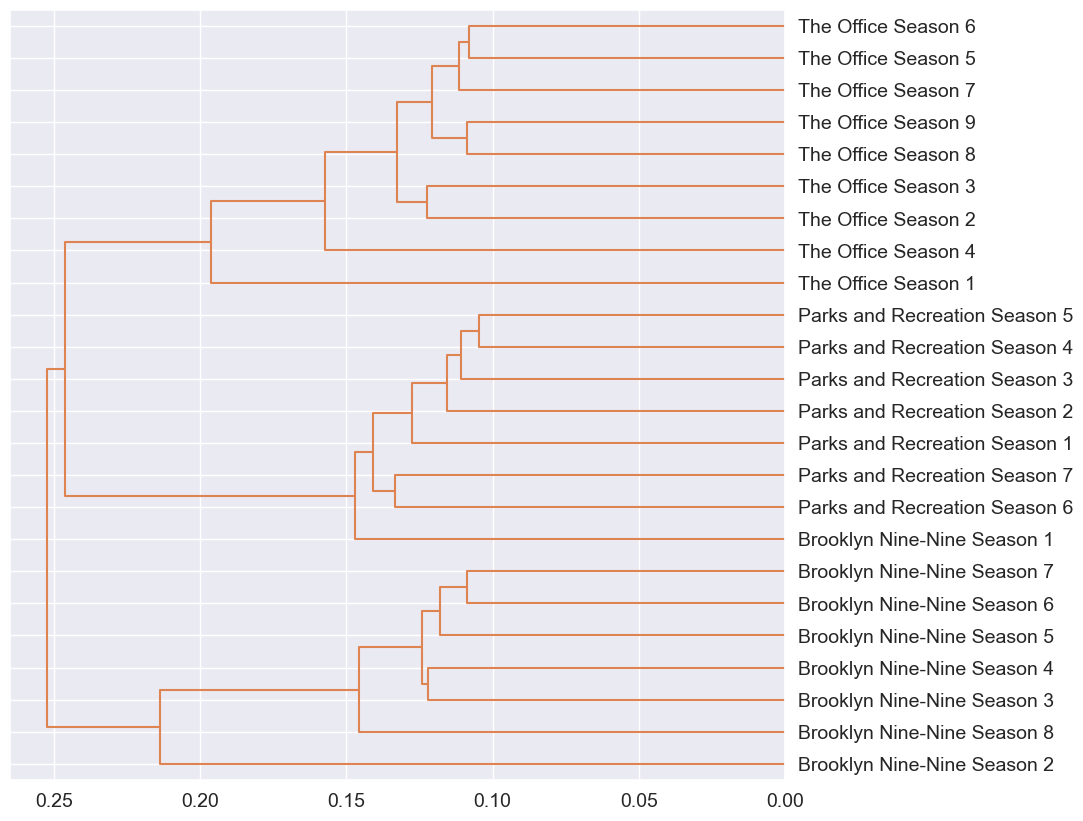

In [26]:
hca(PAIRS.cityblock, linkage_method='weighted', color_thresh=1)

<Figure size 640x480 with 0 Axes>

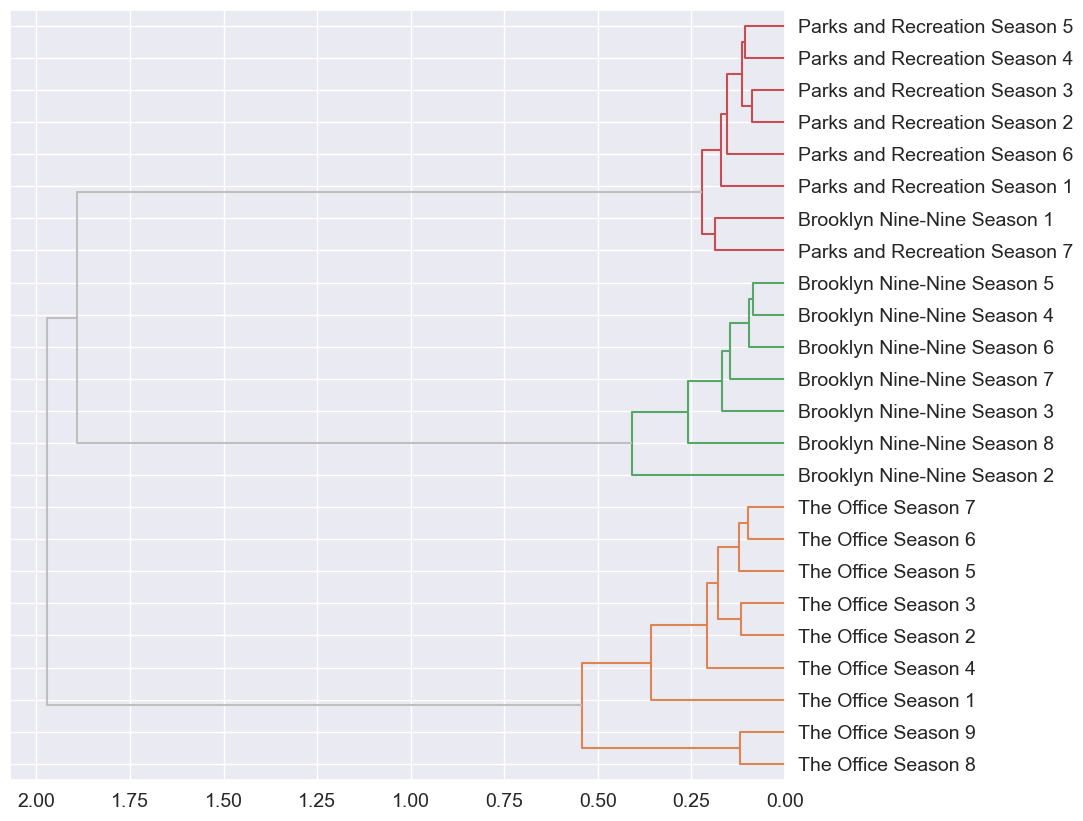

In [27]:
hca(PAIRS.cosine, linkage_method='ward', color_thresh=0.9)

<Figure size 640x480 with 0 Axes>

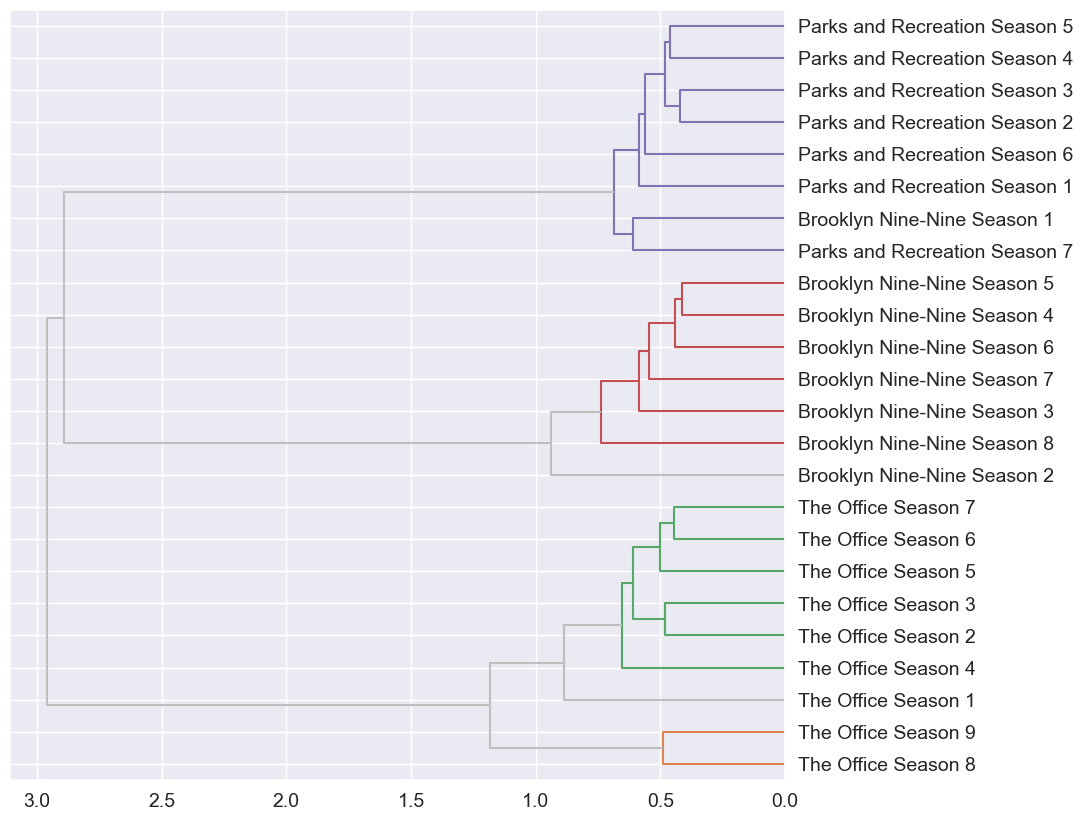

In [28]:
hca(PAIRS.euclidean, linkage_method='ward', color_thresh=0.8)

<Figure size 640x480 with 0 Axes>

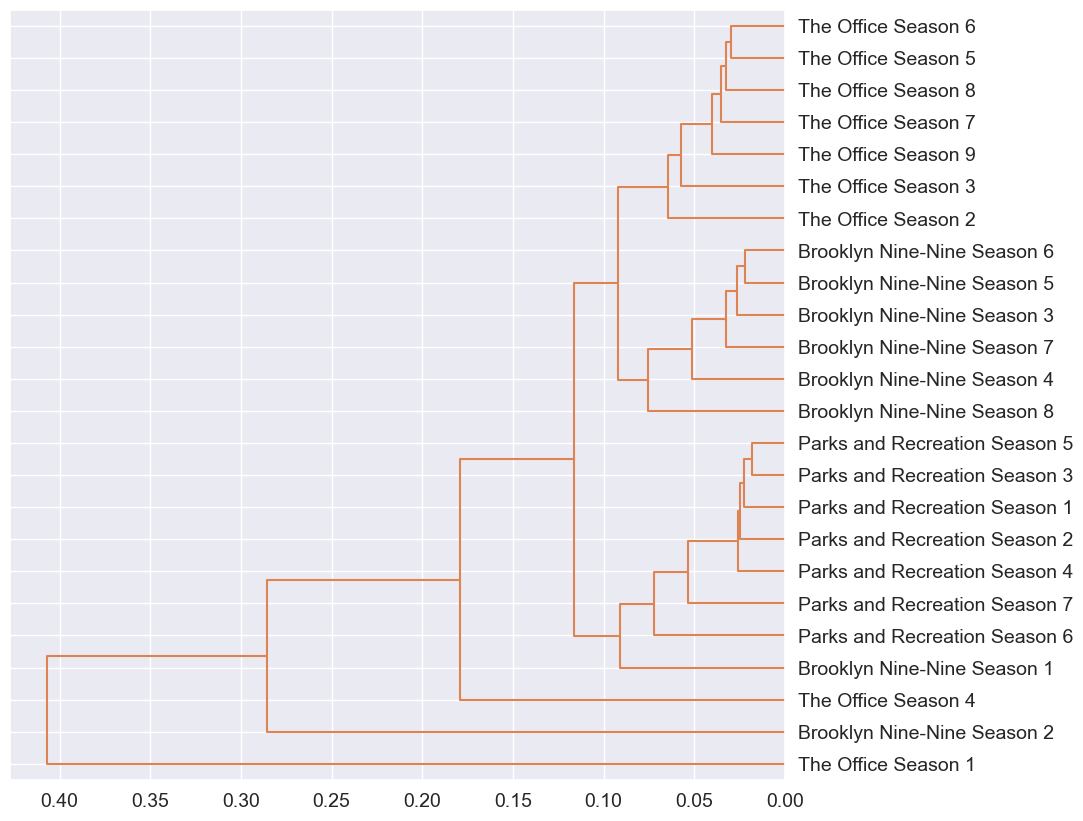

In [29]:
hca(PAIRS.jaccard, linkage_method='weighted', color_thresh=0.7)

<Figure size 640x480 with 0 Axes>

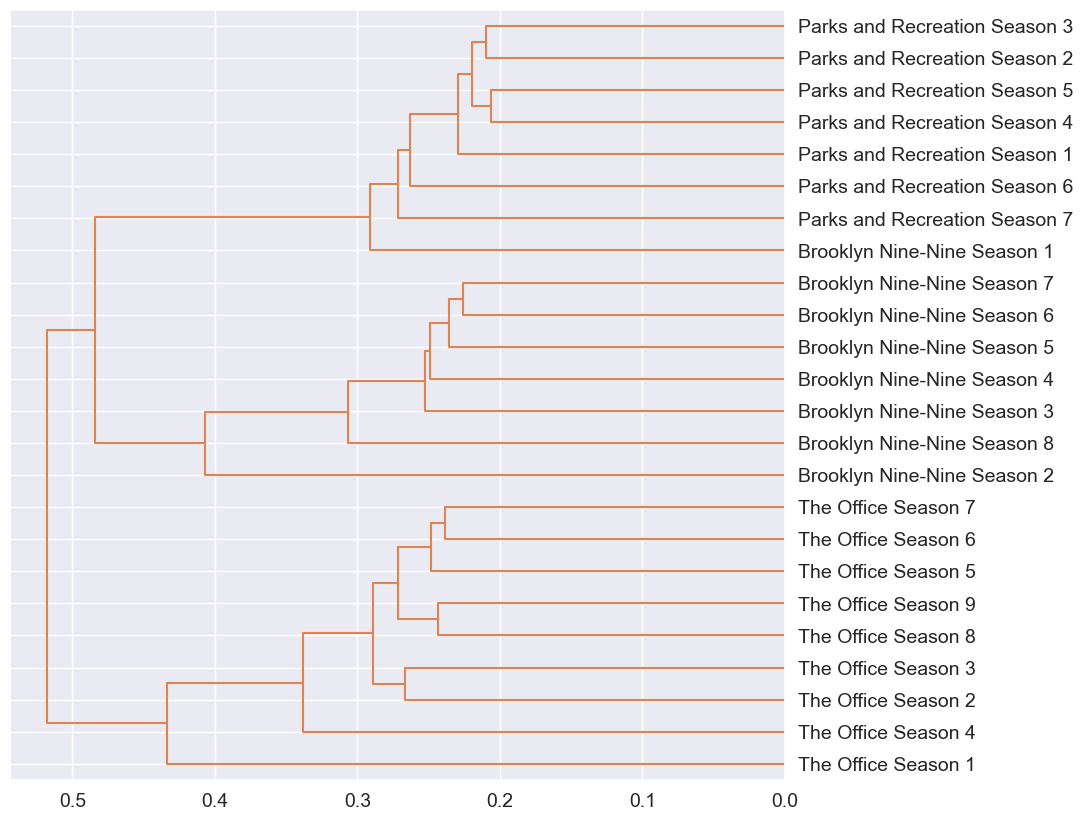

In [30]:
hca(PAIRS.js, linkage_method='weighted', color_thresh=0.6)

### 4.2 Heatmaps showing correlations

### 4.3 Scatter plots

### 4.4 KDE plots

### 4.5 Dispersion plots

### 4.6 t-SNE plots

## 5. Interpretation
Provide your interpretation of the results of exploration, and any conclusion if you are comfortable making them.